# <center>数据处理与数据增强<center/>

## 概述

数据是深度学习的基础，有好的数据输入，可以对整个深度神经网络训练起到非常积极的作用。所以在获取到原始的数据集后，数据加载训练前，因为数据量、性能等等限制，往往会需要先进行数据处理或者数据增强，从而获得更加优化的数据输入。同样，MindSpore也为用户提供了数据处理以及数据增强的功能。

> 本文档适用于CPU、GPU和Ascend环境。

## 整体流程

### 数据处理

1. 导入数据处理操作依赖的模块。

2. 定义一个生成数据集的函数。

3. 调用数据集的函数创建数据集。

4. 使用数据集做数据处理操作，查看每次处理后的输出，体验真实效果。

### 数据增强

在图片训练中，尤其在数据集较小的情况下，用户可以通过一系列的数据增强操作对图片进行预处理，从而丰富了数据集。

1. 导入数据增强操作依赖的模块。

2. 使用一类图片当作数据，体验操作。

3. 定义增强算子，多个数据增强可组合使用。

4. 使用数据集操作数据增强，查看每次增强后的输出，体验真实效果。

## 数据处理操作体验

1. 导入数据处理操作依赖的模块。

In [1]:
import mindspore.dataset as ds
import numpy as np

2. 定义一个生成数据集的函数--`generator_func`用于生成数据集。

In [2]:
def generator_func():
    for i in range(5):
        yield (np.array([i,i+1,i+2,i+3,i+4]),)

3. 通过`generator_func`创建`ds1`数据集，用于执行数据处理操作。

In [3]:
ds1 = ds.GeneratorDataset(generator_func,["data"])
print("ds1:")
for data in ds1.create_dict_iterator():
    print(data["data"])

ds1:
[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]


4. 体验数据处理的具体操作，对照`Before`和`After`的输出，查看实际效果。

- ### repeat

在有限的数据集内，为了优化网络，通常会将一个数据集训练多次。加倍数据集，通过`repeat`来加倍数据量。

我们可以定义`ds2`数据集，调用`repeat`来加倍数据量。其中，将倍数设为2，故`ds3`数据量为原始数据集`ds2`的2倍。

In [4]:
ds2 = ds.GeneratorDataset(generator_func,["data"])
print("Before repeat:")
for data in ds2.create_dict_iterator():
    print(data["data"])
    
ds3 = ds2.repeat(2)
print("After repeat:")
for data in ds3.create_dict_iterator():
    print(data["data"])

Before repeat:
[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
After repeat:
[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]


- ### batch

将数据集进行分批。在实际训练中，可将数据分批处理，将几个数据作为1组，进行训练，减少训练轮次，达到加速训练过程的目的。MindSpore通过`batch`函数来实现数据集分批。

我们调用函数创建数据集`ds4`，调用`batch`实现分批，`batch_size`设置为2，`drop_remainder`默认为`False`，表示在最后行数不够一批时也分为一批，不删除。所以`ds5`每2行分一批，完整分两次后。还剩1行也为一批。

In [5]:
ds4 = ds.GeneratorDataset(generator_func,["data"])
print("Before batch:")
for data in ds4.create_dict_iterator():
    print(data["data"])
    
ds5 = ds4.batch(batch_size=2)
print("batch size:2    drop remainder:False")
for data in ds5.create_dict_iterator():
    print(data["data"])

Before batch:
[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
batch size:2    drop remainder:False
[[0 1 2 3 4]
 [1 2 3 4 5]]
[[2 3 4 5 6]
 [3 4 5 6 7]]
[[4 5 6 7 8]]


我们调用函数创建数据集`ds6`，调用`batch`实现分批，`batch_size`设置为4，`drop_remainder`默认为`True`，表示在最后行数不够一批时将余下行的数据删除。所以`ds7`每4行分一批，完整分一次后。剩余1行删除掉不显示。

In [6]:
ds6 = ds.GeneratorDataset(generator_func,["data"])
print("Before batch:")
for data in ds6.create_dict_iterator():
    print(data["data"])

ds7 = ds6.batch(batch_size=4, drop_remainder=True)
print("batch size:4    drop remainder:True")
for data in ds7.create_dict_iterator():
    print(data["data"])

Before batch:
[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
batch size:4    drop remainder:True
[[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]]


- ### shuffle

对于有序的数据集或者进行过`repeat`的数据集可以进行混洗。`shuffle`操作主要用来将数据混洗，设定的`buffer_size`越大，混洗程度越大，但时间、计算资源消耗会大。

我们调用函数创建数据集`ds8`，调用`shuffle`实现分批，对数据集`ds9`进行混洗，混洗是将数据每行的顺序发生随机变化，可能的输出结果如本次体验。

In [7]:
ds8 = ds.GeneratorDataset(generator_func,["data"])
print("Before shuffle:")
for data in ds8.create_dict_iterator():
    print(data["data"])
    
ds9 = ds8.shuffle(buffer_size=3)
print("After shuffle:")
for data in ds9.create_dict_iterator():
    print(data["data"])

Before shuffle:
[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
After shuffle:
[2 3 4 5 6]
[0 1 2 3 4]
[3 4 5 6 7]
[4 5 6 7 8]
[1 2 3 4 5]


- ### map

`map`即对数据进行处理，譬如将彩色图片的数据集转化为灰色图片的数据集等，应用非常灵活。 MindSpore提供`map`函数对数据集进行映射操作，用户可以将提供的函数或算子作用于指定的列数据。

我们调用函数创建数据集`ds10`，调用`map`函数，将自定义的匿名函数`lambda`传参到`map`函数，作用于数据集`ds10`，使数据集中数据的值平方。

In [8]:
ds10 = ds.GeneratorDataset(generator_func,["data"])
print("Before map:")
for data in ds10.create_dict_iterator():
    print(data["data"])

func = lambda x:x**2
ds11 = ds10.map(operations=func, input_columns="data")
print("After map:")
for data in ds11.create_dict_iterator():
    print(data["data"])

Before map:
[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
After map:
[ 0  1  4  9 16]
[ 1  4  9 16 25]
[ 4  9 16 25 36]
[ 9 16 25 36 49]
[16 25 36 49 64]


- ### zip

MindSpore提供`zip`函数，可将多个数据集合并成1个数据集。如果两个数据集的列名相同，则不会合并，请注意列的命名。如果两个数据集的行数不同，合并后的行数将和较小行数保持一致。

我们调用函数创建数据集`ds12`，使用前面方法定义构造数据集函数`generator_func2`，与`generator_func`函数生成的数据不同，用来创建数据集`ds13`。通过`zip`将数据集`ds12`的`data`列和`ds13`的`data2`列合并成数据集`ds14`。

In [9]:
ds12 = ds.GeneratorDataset(generator_func,["data"])
print("Before zip:")
print("ds12:")
for data in ds12.create_dict_iterator():
    print(data["data"])
    
def generator_func2():
    for i in range(5):
        yield (np.array([i,i-1,i-2, i-3, i-4]),)
        
ds13 = ds.GeneratorDataset(generator_func2,["data2"])
print("ds13:")
for data in ds13.create_dict_iterator():
    print(data["data2"])
    
ds14 = ds.zip((ds12,ds13))
print("After zip:")
for data in ds14.create_dict_iterator():
    print(data)

Before zip:
ds12:
[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
ds13:
[ 0 -1 -2 -3 -4]
[ 1  0 -1 -2 -3]
[ 2  1  0 -1 -2]
[ 3  2  1  0 -1]
[4 3 2 1 0]
After zip:
{'data': Tensor(shape=[5], dtype=Int64, value= [0, 1, 2, 3, 4]), 'data2': Tensor(shape=[5], dtype=Int64, value= [ 0, -1, -2, -3, -4])}
{'data': Tensor(shape=[5], dtype=Int64, value= [1, 2, 3, 4, 5]), 'data2': Tensor(shape=[5], dtype=Int64, value= [ 1,  0, -1, -2, -3])}
{'data': Tensor(shape=[5], dtype=Int64, value= [2, 3, 4, 5, 6]), 'data2': Tensor(shape=[5], dtype=Int64, value= [ 2,  1,  0, -1, -2])}
{'data': Tensor(shape=[5], dtype=Int64, value= [3, 4, 5, 6, 7]), 'data2': Tensor(shape=[5], dtype=Int64, value= [ 3,  2,  1,  0, -1])}
{'data': Tensor(shape=[5], dtype=Int64, value= [4, 5, 6, 7, 8]), 'data2': Tensor(shape=[5], dtype=Int64, value= [4, 3, 2, 1, 0])}


## 数据增强操作体验

### 使用`c_transforms`模块进行数据增强。

1. 导入图片加载和显示依赖的模块。

In [10]:
import matplotlib.pyplot as plt

2. 使用一类图片当作数据，体验操作。在一个数据量比较大的图片数据集中，例如数据集名称叫`images`，它的存储方式是在`images`文件夹下，有不同子类别的文件夹，一个子类别文件夹中的图片属于同一类。所以我们本次体验所使用的图片放置方法，就需要创建`enhance_images`文件夹，接着在`enhance_images`下建一个名为`sample`的子类别文件夹，将图片放在`sample`文件夹中即可。如果有更多类别图片，可以在`enhance_images`下创建对应的子类别文件夹，将图片放入即可。

增强体验使用的图片数据下载，执行如下命令，生成图片数据的保存路径`./enhance_images/sample/`，并将下载下来的图片数据`sample1.png`和`sample2.png`移入其中：

In [11]:
!wget https://gitee.com/mindspore/docs/raw/master/tutorials/notebook/data_loading_enhance/enhance_images/sample/sample1.png
!wget https://gitee.com/mindspore/docs/raw/master/tutorials/notebook/data_loading_enhance/enhance_images/sample/sample2.png
!mkdir -p ./enhance_images/sample/
!mv sample1.png sample2.png -t  ./enhance_images/sample/
!tree ./enhance_images/sample/

--2020-11-26 16:42:13--  https://gitee.com/mindspore/docs/raw/master/tutorials/notebook/data_loading_enhance/enhance_images/sample/sample1.png
Resolving proxy-notebook.modelarts-dev-proxy.com (proxy-notebook.modelarts-dev-proxy.com)... 192.168.0.172
Connecting to proxy-notebook.modelarts-dev-proxy.com (proxy-notebook.modelarts-dev-proxy.com)|192.168.0.172|:8083... connected.
Proxy request sent, awaiting response... 200 OK
Length: unspecified [image/png]
Saving to: ‘sample1.png’

sample1.png             [  <=>               ] 889.02K  2.39MB/s    in 0.4s    

2020-11-26 16:42:14 (2.39 MB/s) - ‘sample1.png’ saved [910357]

--2020-11-26 16:42:14--  https://gitee.com/mindspore/docs/raw/master/tutorials/notebook/data_loading_enhance/enhance_images/sample/sample2.png
Resolving proxy-notebook.modelarts-dev-proxy.com (proxy-notebook.modelarts-dev-proxy.com)... 192.168.0.172
Connecting to proxy-notebook.modelarts-dev-proxy.com (proxy-notebook.modelarts-dev-proxy.com)|192.168.0.172|:8083... conn

使用过程中可以在此路径下找到图片数据，并参照本次体验中图片放置的位置来新建文件夹。

In [12]:
DATA_DIR = "./enhance_images"
ds1 = ds.ImageFolderDataset(DATA_DIR, decode=True)

3. 导入定义算子和数据增强处理依赖的模块。定义增强算子，多个数据增强可组合使用，以`Resize`为例。

In [13]:
from mindspore.dataset.vision import Inter
import mindspore.dataset.vision.c_transforms as transforms

In [14]:
resize_op = transforms.Resize(size=(800,800), interpolation=Inter.LINEAR)
ds2 = ds1.map(operations=resize_op, input_columns="image")

4. 使用数据集操作数据增强,运行结果可以看到，原始图片与进行数据处理`Resize`后的图片对比，可以看到图片由原来的1920 * 1200像素，变化为800 * 800像素，内容完整。

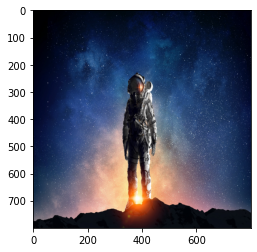

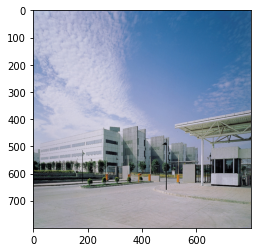

In [15]:
for data in ds2.create_dict_iterator():
    imgplot_resized = plt.imshow(data["image"].asnumpy())
    plt.show()

### 使用`py_transforms`模块进行数据增强。

1. 将该模块引入到代码。

In [16]:
from mindspore.dataset.transforms.py_transforms import Compose
import mindspore.dataset.vision.py_transforms as transforms

2. 定义数据增强算子，通过`Compose`接口将多个数据增强组合使用。

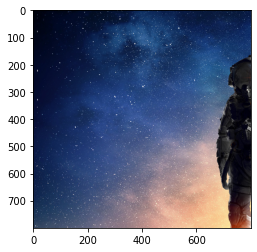

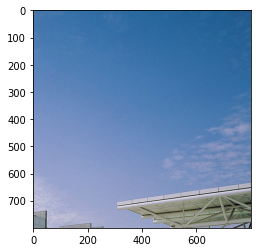

In [17]:
ds3 = ds.ImageFolderDataset(DATA_DIR)

transforms_list = [
    transforms.Decode(),  # Decode images to PIL format.
    transforms.RandomCrop(size=(800,800)),
    transforms.ToTensor()  # Convert PIL images to Numpy ndarray.
]
compose = Compose(transforms_list)
ds4 = ds3.map(operations=compose, input_columns="image")
for data in ds4.create_dict_iterator():
    imgplot_resized = plt.imshow(data["image"].asnumpy().transpose(1, 2, 0))
    plt.show()

3. 运行结果可以看到，原始图片与进行数据处理（RandomCrop）后的图片对比，可以看到图片由原来的1920 * 1200像素，变化为800 * 800像素，是在原始图像中随机裁剪出800 * 800像素图片。

<!-- ![image.png](attachment:image.png) -->

## 总结

以上体验内容便是完成了数据处理和数据增强的一些操作，通过这些体验我们全面了解了数据处理和增强的用法，并且更直观的感受到数据处理和增强后与原始数据的差异，明白这些方法的用途。